In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
x = df.drop("Chance of Admit ", axis= 1)

In [25]:
x = x.drop("Serial No.", axis= 1)

In [26]:
y = df["Chance of Admit "]

In [27]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [28]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [54]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
241,317,103,2,2.5,2.0,8.15,0
448,312,109,2,2.5,4.0,9.02,0
75,329,114,2,2.0,4.0,8.56,1
212,338,120,4,5.0,5.0,9.66,1
481,323,107,4,3.0,2.5,8.48,1


In [55]:
x_train_tf = scaler.fit_transform(x_train)

In [56]:
x_test_tf = scaler.transform(x_test)

In [57]:
svr = SVR(kernel="rbf")

In [58]:
svr.fit(x_train_tf, y_train)

SVR()

In [59]:
prediction = svr.predict(x_test_tf)

In [60]:
prediction

array([0.61165723, 0.74324364, 0.67876699, 0.86483176, 0.6953349 ,
       0.67677106, 0.65661927, 0.74165954, 0.69323953, 0.69434529,
       0.4642039 , 0.46399154, 0.88523663, 0.73997869, 0.69397441,
       0.57678022, 0.62181539, 0.87284243, 0.75453787, 0.81162128,
       0.78235114, 0.60859143, 0.72615991, 0.78906609, 0.85933252,
       0.65541847, 0.58592771, 0.70857278, 0.61147595, 0.51188984,
       0.57671137, 0.67932053, 0.83794615, 0.7082672 , 0.80371646,
       0.79325252, 0.52009628, 0.71463621, 0.59726077, 0.86182714,
       0.68509334, 0.60394616, 0.7995104 , 0.85832786, 0.63557538,
       0.85717898, 0.868344  , 0.64898688, 0.66093687, 0.54541543,
       0.74198678, 0.7299681 , 0.71458593, 0.48396443, 0.4666125 ,
       0.8730518 , 0.72202506, 0.7771228 , 0.51815362, 0.70842934,
       0.7437248 , 0.6281241 , 0.68042451, 0.6133902 , 0.60091235,
       0.67076079, 0.55122723, 0.74947914, 0.66961537, 0.66583681,
       0.84667257, 0.47359682, 0.61288998, 0.70477486, 0.65598

In [61]:
residual = y_test- prediction

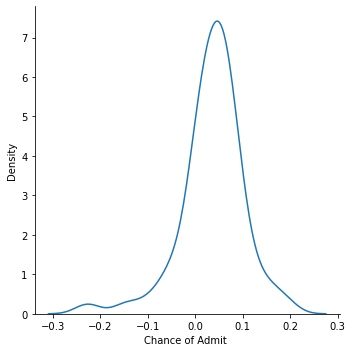

In [62]:
sns.displot(residual, kind="kde")

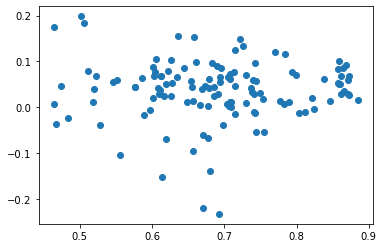

In [63]:
plt.scatter(prediction, residual)

In [66]:
svr.score(x_test_tf, y_test)

0.6327437912160306

In [68]:
parameters = {'kernel':['rbf'], 'C':[1, 10]}

In [69]:
clf = GridSearchCV(svr, parameters, refit = True, verbose =0,cv=5)

In [70]:
clf.fit(x_train_tf, y_train )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['rbf']})

In [71]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [72]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008442,0.000847,0.00525,0.004322,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.766339,0.749908,0.601273,0.719105,0.764865,0.720298,0.061889,1
1,0.009540,0.005814,0.00000,0.000000,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.755564,0.745450,0.558711,0.695142,0.693156,0.689605,0.070208,2


In [73]:
y_pred = clf.predict(x_test)

C:\Users\MGC\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [74]:
accuracy = clf.best_score_ *100

In [75]:
accuracy

72.02978221197633